# <center> <font color=#B40404>Neural Networks Project</center>
    
## <center> <font color=#B40404>Submitted by Utathya Ghosh</center>
    
### <center> <font color=#B40404>Batch - AIML Online Jan 21-A</center>

# <center>PART ONE</center>
# <center>PROJECT BASED</center>
# <center>TOTAL SCORE - 30</center>

DOMAIN: Electronics and Telecommunication

CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters

DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters
2. Signal_Quality: Final signal strength or quality

PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number]

Steps and tasks:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, levene, shapiro
from sklearn.preprocessing import StandardScaler
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

#### 1. Import data

In [2]:
# Load csv file into master dataframe
df_master = pd.read_csv("Part- 1 - Signal.csv")

###### <font color=#B40404>We will create the train, validation and test set early since we are also going to perform statistical tests on them as groups so as to show/confirm that they are from the same population.

In [3]:
# Separating dependant and independent variables
X_train = df_master.iloc[:, :-1]
y_train = df_master.iloc[:, -1]

# Normalising the independent variables
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df_master.iloc[:, :-1].columns)

# setting up validation, testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69, stratify=y_test)

#### 2. Data analysis & visualisation
###### • Perform relevant and detailed statistical analysis on the data

In [4]:
# View basic stats of dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# View detailed stats of the dataframe
df_master.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

###### <font color=#B40404>Let's check the distribution of each class

In [6]:
print("Train")
print(np.unique(y_train, return_counts=True))
print("Test")
print(np.unique(y_test, return_counts=True))
print("Val")
print(np.unique(y_val, return_counts=True))

Train
(array([3, 4, 5, 6, 7, 8], dtype=int64), array([  5,  27, 340, 319,  99,   9], dtype=int64))
Test
(array([3, 4, 5, 6, 7, 8], dtype=int64), array([  2,  13, 171, 160,  50,   4], dtype=int64))
Val
(array([3, 4, 5, 6, 7, 8], dtype=int64), array([  3,  13, 170, 159,  50,   5], dtype=int64))


###### <font color=#B40404>Inference: Clearly the classes are not uniformly distributed, hence accuracy will not be the best metric.

###### <font color=#B40404>Performing a Tukey hsd test

In [7]:
# Performing Tukey's hsd test on different groups, based on Class variable, for all independent variables
# Running a for loop to extract each attribute name individually
for col in df_master.columns[:-1]:
    # Printing newline for cosmetic purposes
    print("\n", col, "\n")
    # Display Tukey hsd test results
    print(pairwise_tukeyhsd(df_master[col], df_master["Signal_Strength"], alpha=0.05))


 Parameter 1 

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4  -0.5808    0.9 -2.2795  1.118  False
     3      5  -0.1927    0.9 -1.7622 1.3767  False
     3      6  -0.0128    0.9 -1.5831 1.5574  False
     3      7   0.5124    0.9 -1.0844 2.1091  False
     3      8   0.2067    0.9 -1.7366 2.1499  False
     4      5    0.388 0.5991 -0.3146 1.0906  False
     4      6   0.5679 0.1942 -0.1364 1.2723  False
     4      7   1.0931  0.001  0.3315 1.8547   True
     4      8   0.7874 0.5438 -0.5567 2.1316  False
     5      6   0.1799 0.4099 -0.0915 0.4514  False
     5      7   0.7051  0.001  0.3081 1.1021   True
     5      8   0.3994    0.9 -0.7772  1.576  False
     6      7   0.5252 0.0026  0.1251 0.9252   True
     6      8   0.2195    0.9 -0.9581 1.3971  False
     7      8  -0.3057    0.9 -1.5184  0.907  False
------------------------------------------------

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   0.0264    0.9  -0.135 0.1879  False
     3      5    0.051    0.9 -0.0982 0.2001  False
     3      6   0.1053 0.3349 -0.0439 0.2546  False
     3      7   0.1713 0.0165  0.0195  0.323   True
     3      8   0.1978 0.0277  0.0131 0.3825   True
     4      5   0.0246    0.9 -0.0422 0.0913  False
     4      6   0.0789 0.0102   0.012 0.1459   True
     4      7   0.1448  0.001  0.0725 0.2172   True
     4      8   0.1714 0.0019  0.0436 0.2991   True
     5      6   0.0544  0.001  0.0286 0.0802   True
     5      7   0.1203  0.001  0.0826  0.158   True
     5      8   0.1468 0.0026   0.035 0.2586   True
     6      7   0.0659  0.001  0.0279  0.104   True
     6      8   0.0924 0.1726 -0.0195 0.2044  False
     7      8   0.0265    0.9 -0.0887 0.1418  False
---------------------------------------------------

 Parameter 

###### <font color=#B40404>Let's compare the Validation and Test set to the Train set to show that they are similar in statistics

In [8]:
# Check the difference in standard deviation between validation and test set against train set
print("Validation\n")
# Print the difference in std
print(X_train.std() - X_val.std())

print("\nTest\n")
# Print the difference in std
print(X_train.std() - X_test.std())

Validation

Parameter 1    -0.013613
Parameter 2     0.007935
Parameter 3    -0.019101
Parameter 4    -0.184162
Parameter 5     0.083585
Parameter 6     0.032207
Parameter 7    -0.008781
Parameter 8    -0.006019
Parameter 9     0.018046
Parameter 10    0.301464
Parameter 11    0.005441
dtype: float64

Test

Parameter 1    -0.012933
Parameter 2     0.024601
Parameter 3     0.008648
Parameter 4    -0.141007
Parameter 5     0.303672
Parameter 6    -0.016860
Parameter 7    -0.016655
Parameter 8    -0.023491
Parameter 9    -0.034784
Parameter 10    0.213939
Parameter 11    0.001439
dtype: float64


###### <font color=#B40404>Since Parameter 4, 5 & 10 have a slightly higher std difference we will set  equal_var to False for those parameters

In [9]:
# Loop through all columns
for col in df_master.columns[:-1]:
    # Print column name
    print(col)
    
    # Run a Welch test if Parameter 4, 5 or 10 else run t-test
    if col in ["Parameter 4, Parameter 5, Parameter 10"]:
        print("Validation set: ", ttest_ind(X_train[col], X_val[col], equal_var = False))
        print("Test set: ", ttest_ind(X_train[col], X_test[col], equal_var = False))
    else:
        print("Validation set: ", ttest_ind(X_train[col], X_val[col]))
        print("Test set: ", ttest_ind(X_train[col], X_test[col]))

Parameter 1
Validation set:  Ttest_indResult(statistic=0.3706527253849732, pvalue=0.7109617864922428)
Test set:  Ttest_indResult(statistic=1.1906523572200014, pvalue=0.234026151364803)
Parameter 2
Validation set:  Ttest_indResult(statistic=0.7210102948796809, pvalue=0.47104397151023725)
Test set:  Ttest_indResult(statistic=0.9357710978552741, pvalue=0.34957980064120686)
Parameter 3
Validation set:  Ttest_indResult(statistic=0.33128481929614656, pvalue=0.7404873440335276)
Test set:  Ttest_indResult(statistic=1.0189233262210697, pvalue=0.308445260944195)
Parameter 4
Validation set:  Ttest_indResult(statistic=-0.8319281132589157, pvalue=0.4056154547111238)
Test set:  Ttest_indResult(statistic=0.0708404317518916, pvalue=0.9435365860531325)
Parameter 5
Validation set:  Ttest_indResult(statistic=0.6255255444271164, pvalue=0.5317454269898378)
Test set:  Ttest_indResult(statistic=1.3813785537459684, pvalue=0.167420390419297)
Parameter 6
Validation set:  Ttest_indResult(statistic=0.038996127353

###### • Perform relevant and detailed uni, bi and multi variate analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.

###### <font color=#B40404>Let's see the histogram of each feature

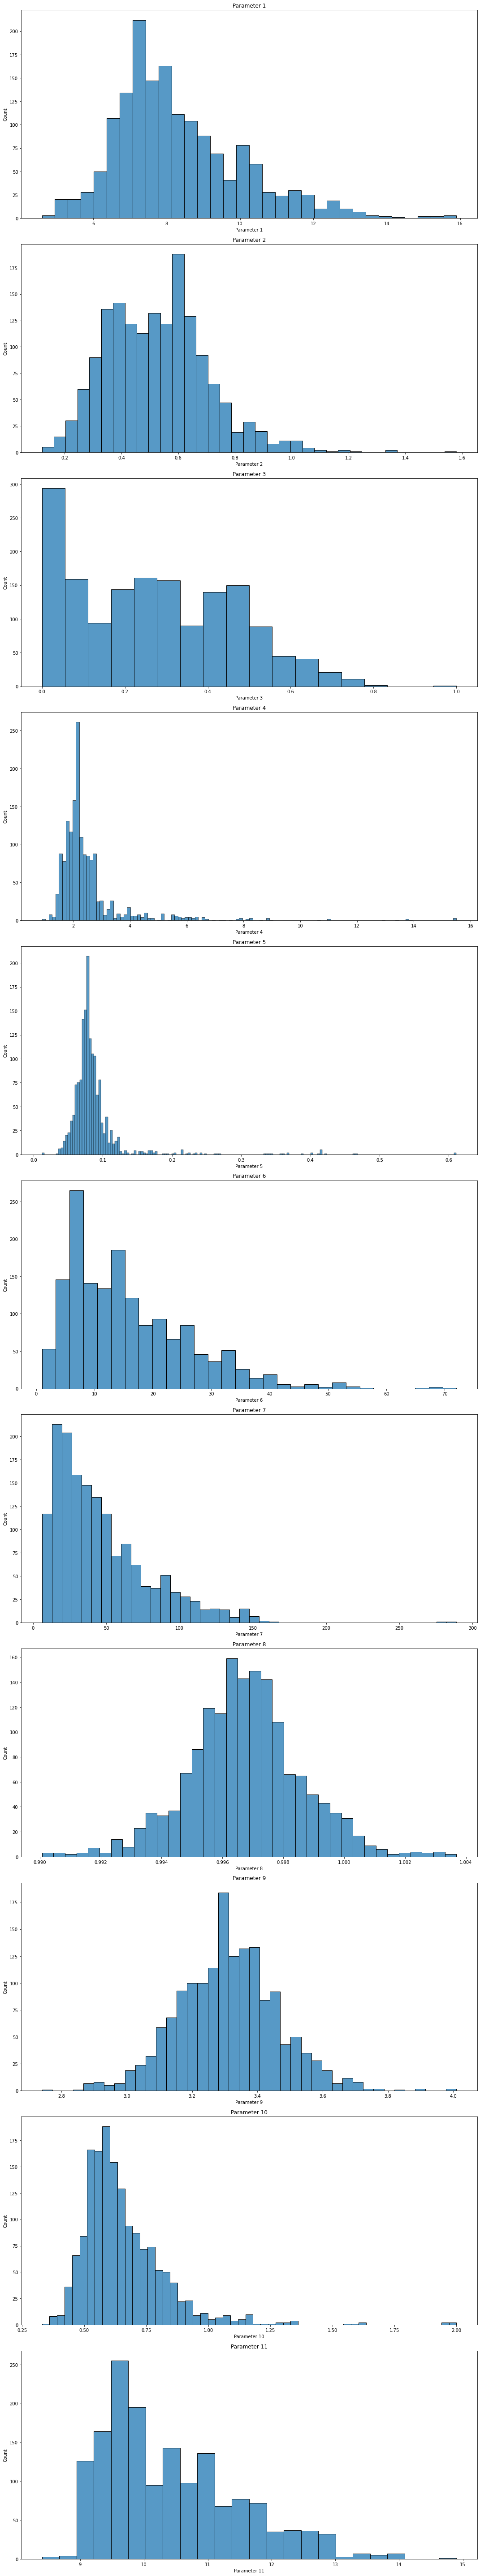

In [10]:
# Create the subplots
f, axes = plt.subplots(11, 1, figsize=(15,80))
cnt=0

# Automate each feature histogram
for col in df_master.columns[:-1]:
    sns.histplot(df_master[col],  ax=axes[cnt])
    axes[cnt].set_title(col)
    cnt+=1
    
f.tight_layout()
plt.show()

###### <font color=#B40404>Let's see the Multivariate Analysis of groups formed by Signal_Strength

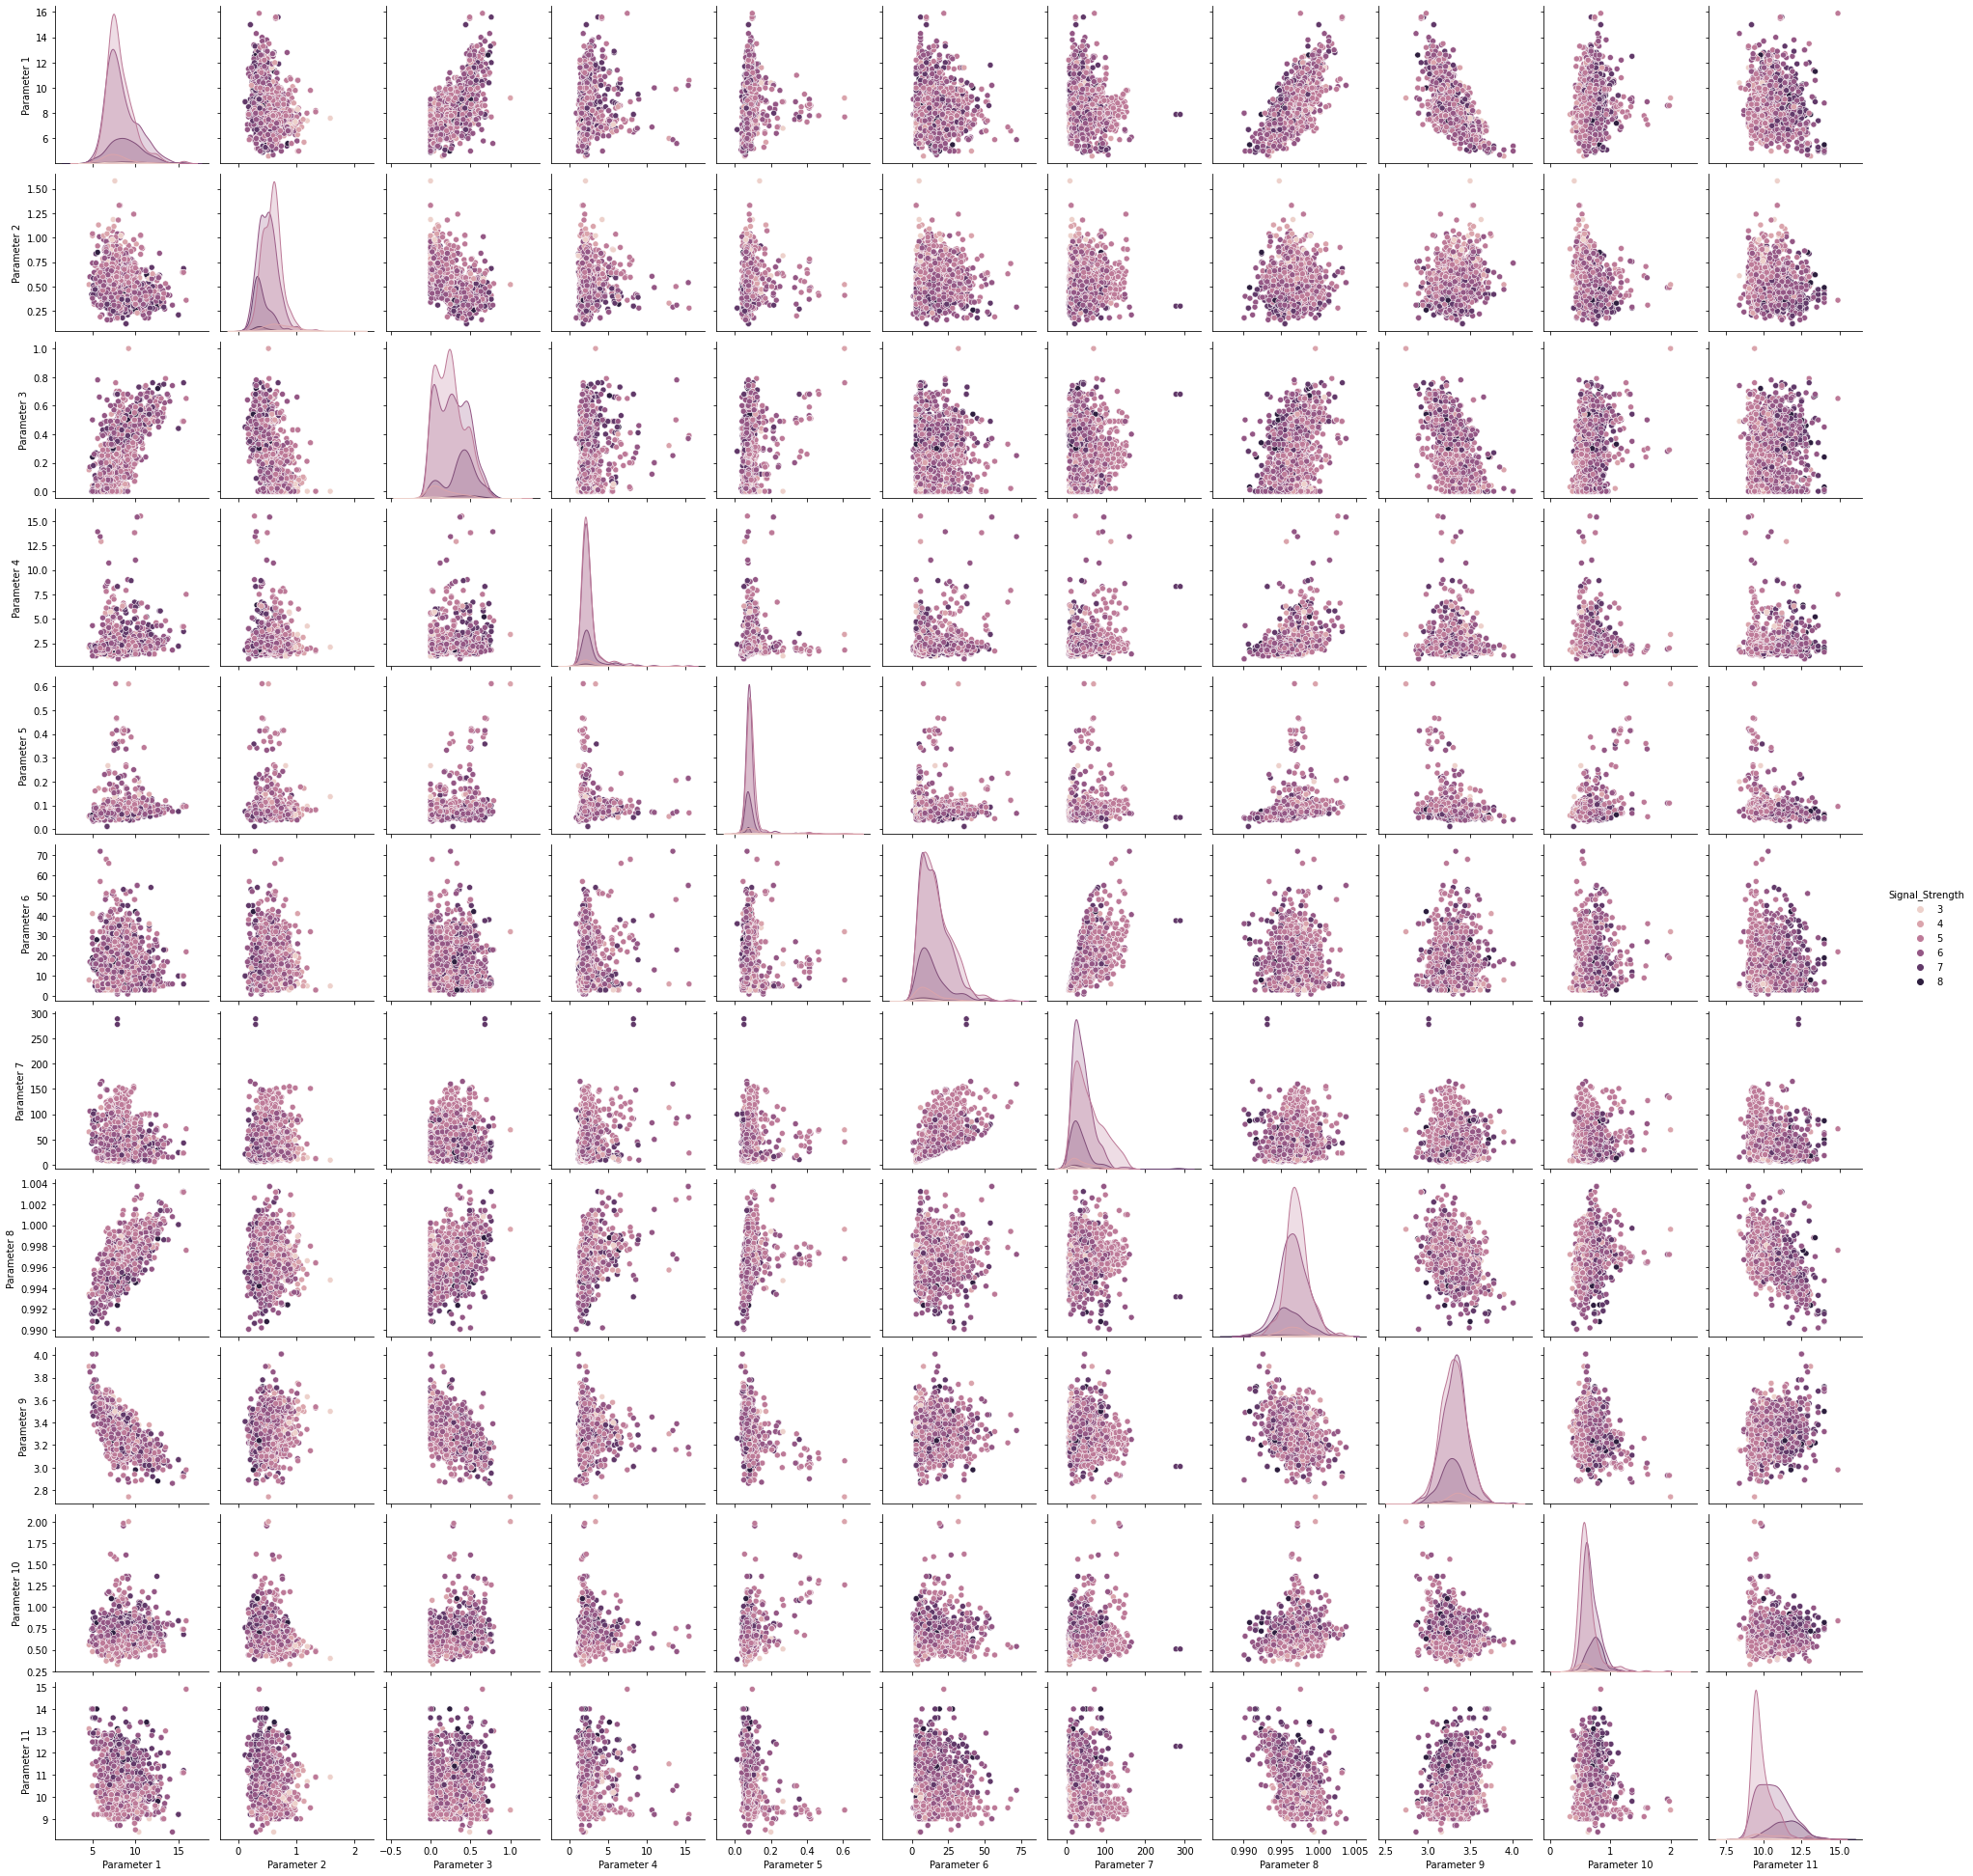

In [11]:
# Multivariate Analysis using bivariate pairplot
sns.pairplot(df_master, hue="Signal_Strengtha

###### <font color=#B40404>Now let's divide our dataset into Train, Validation and Test set and observe them through a Multivariate Analysis

In [12]:
# Separating rows by either train, val or test set group
grp = []
for idx in range(len(df_master)):
    if idx in X_train.index:
        grp.append('Val')
    elif idx in X_test.index:
        grp.append('Test')
    else:
        grp.append('Train')
df_master["Group"] = grp

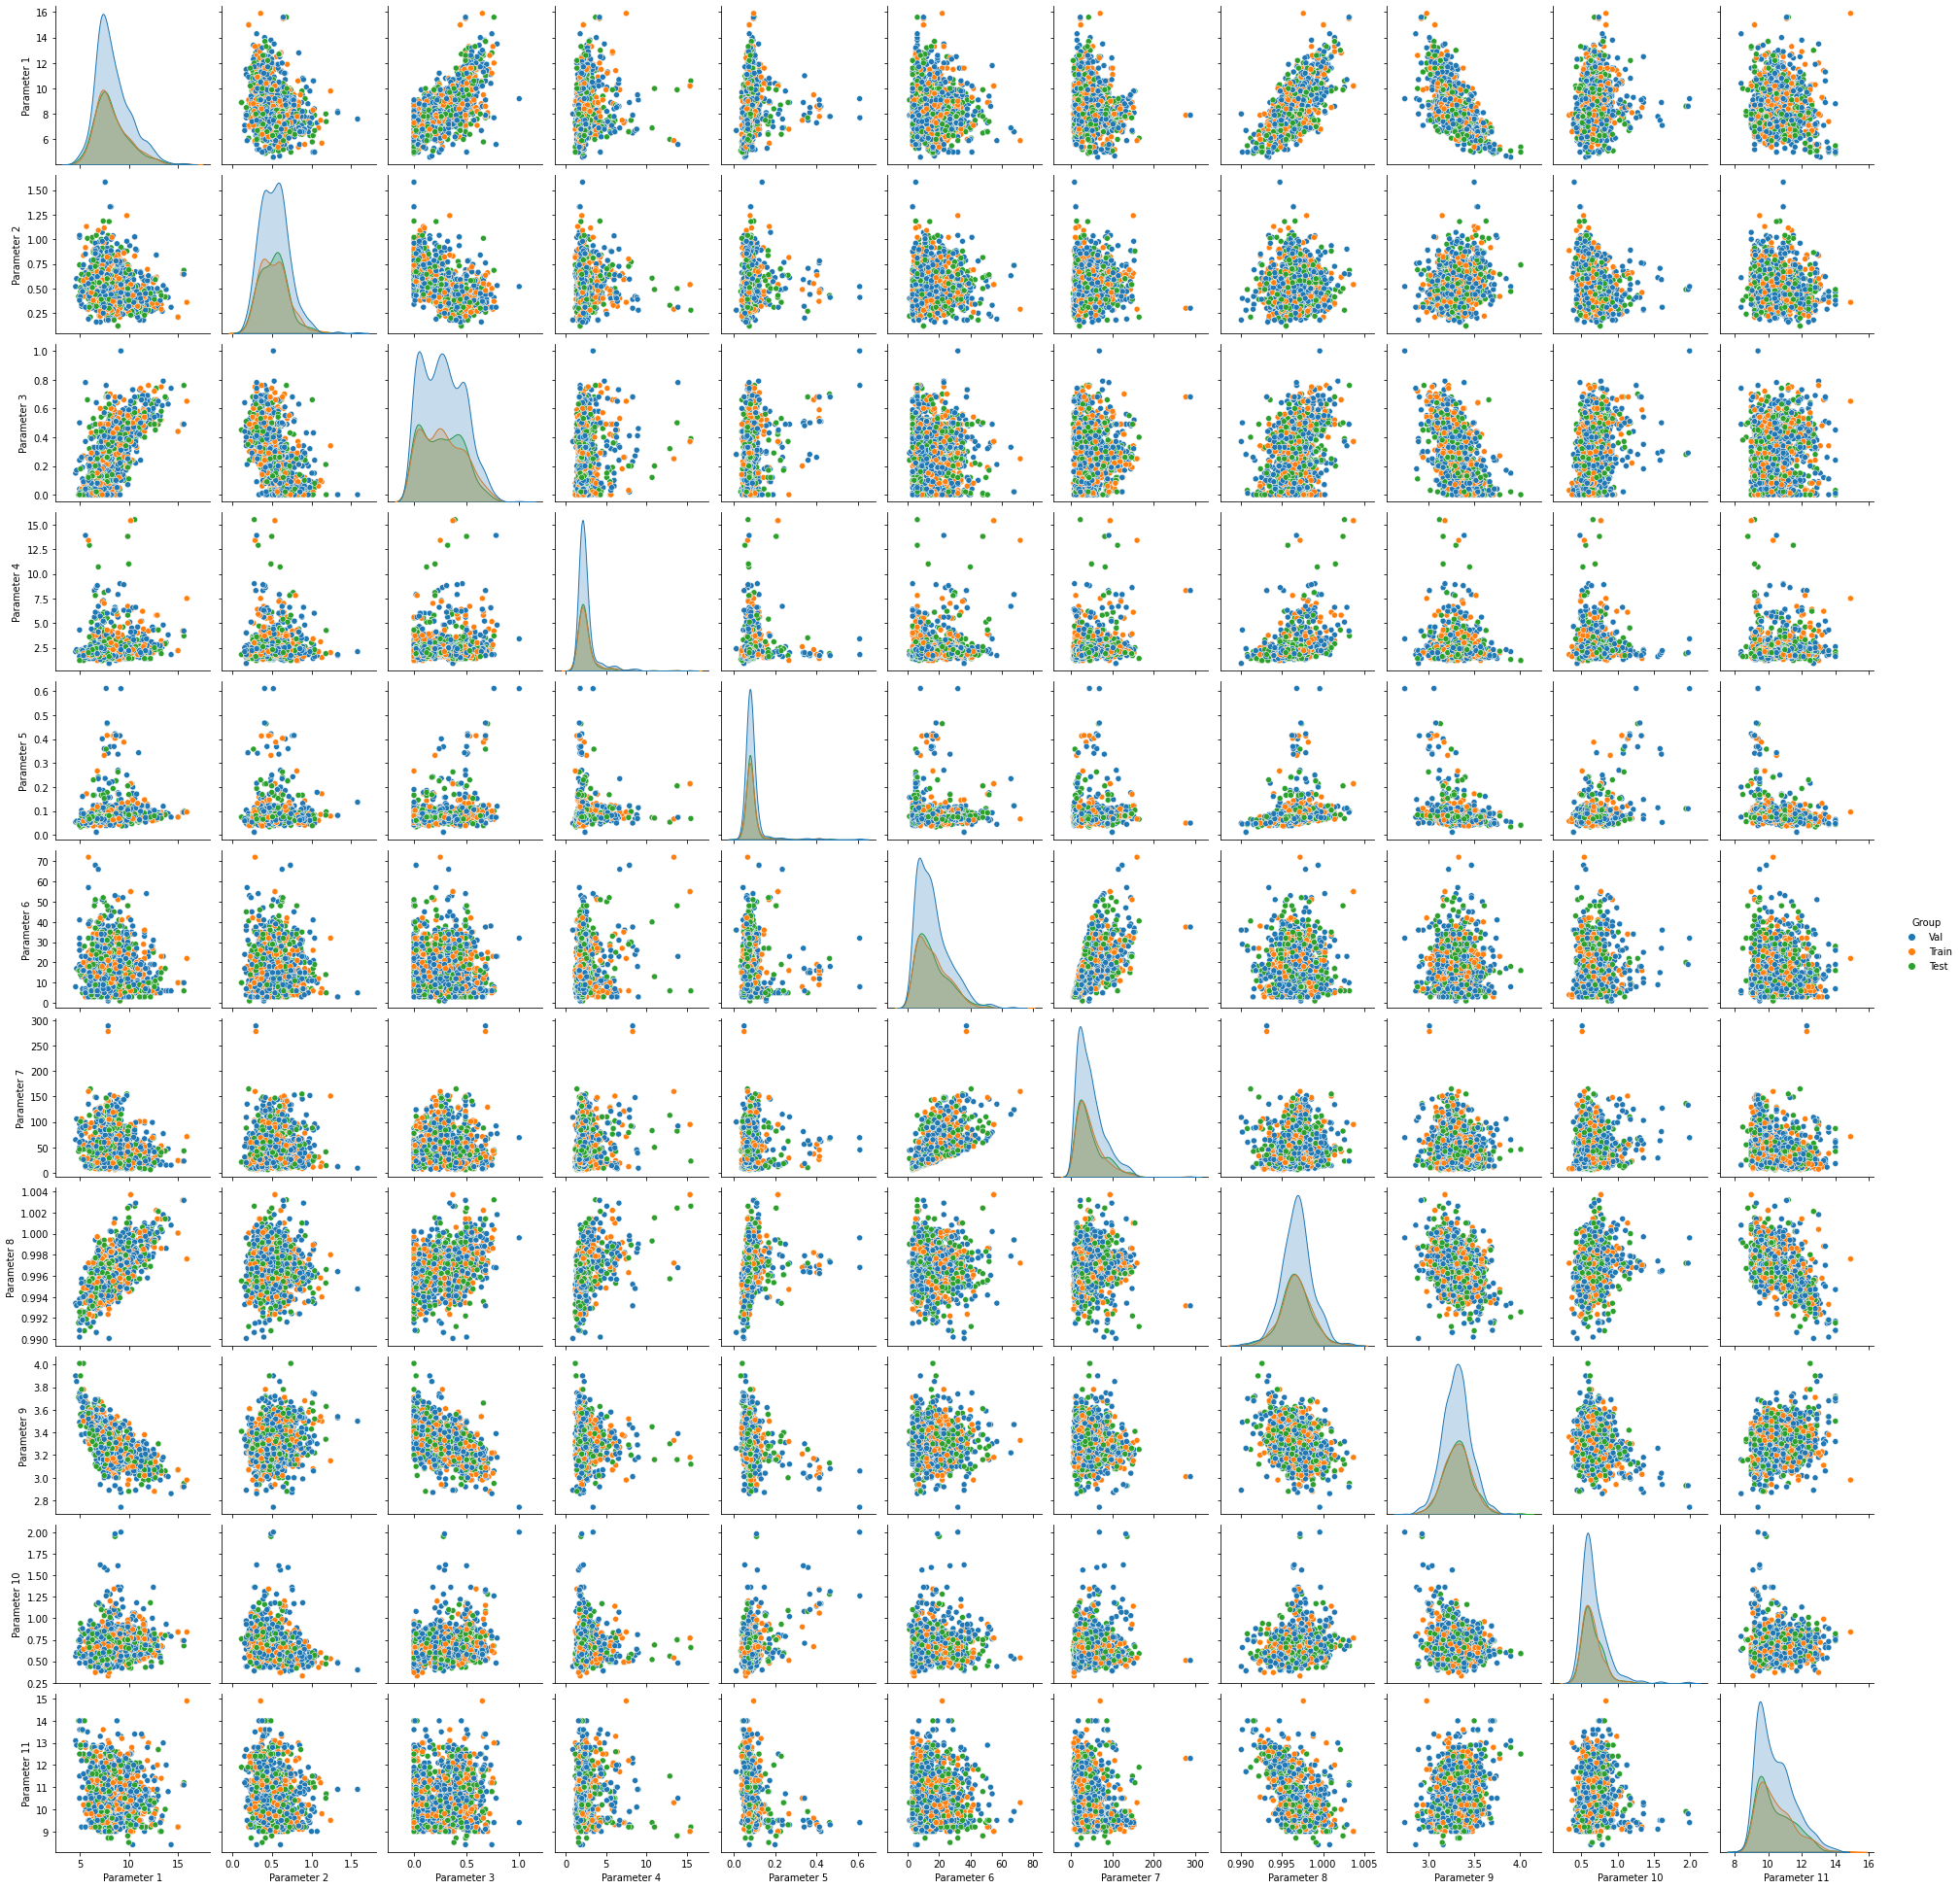

In [13]:
# Multivariate Analysis using bivariate pairplot
sns.pairplot(df_master.drop("Signal_Strength", axis=1), hue="Group")

###### <font color=#B40404>Let's check one bivariate analysis in more detail

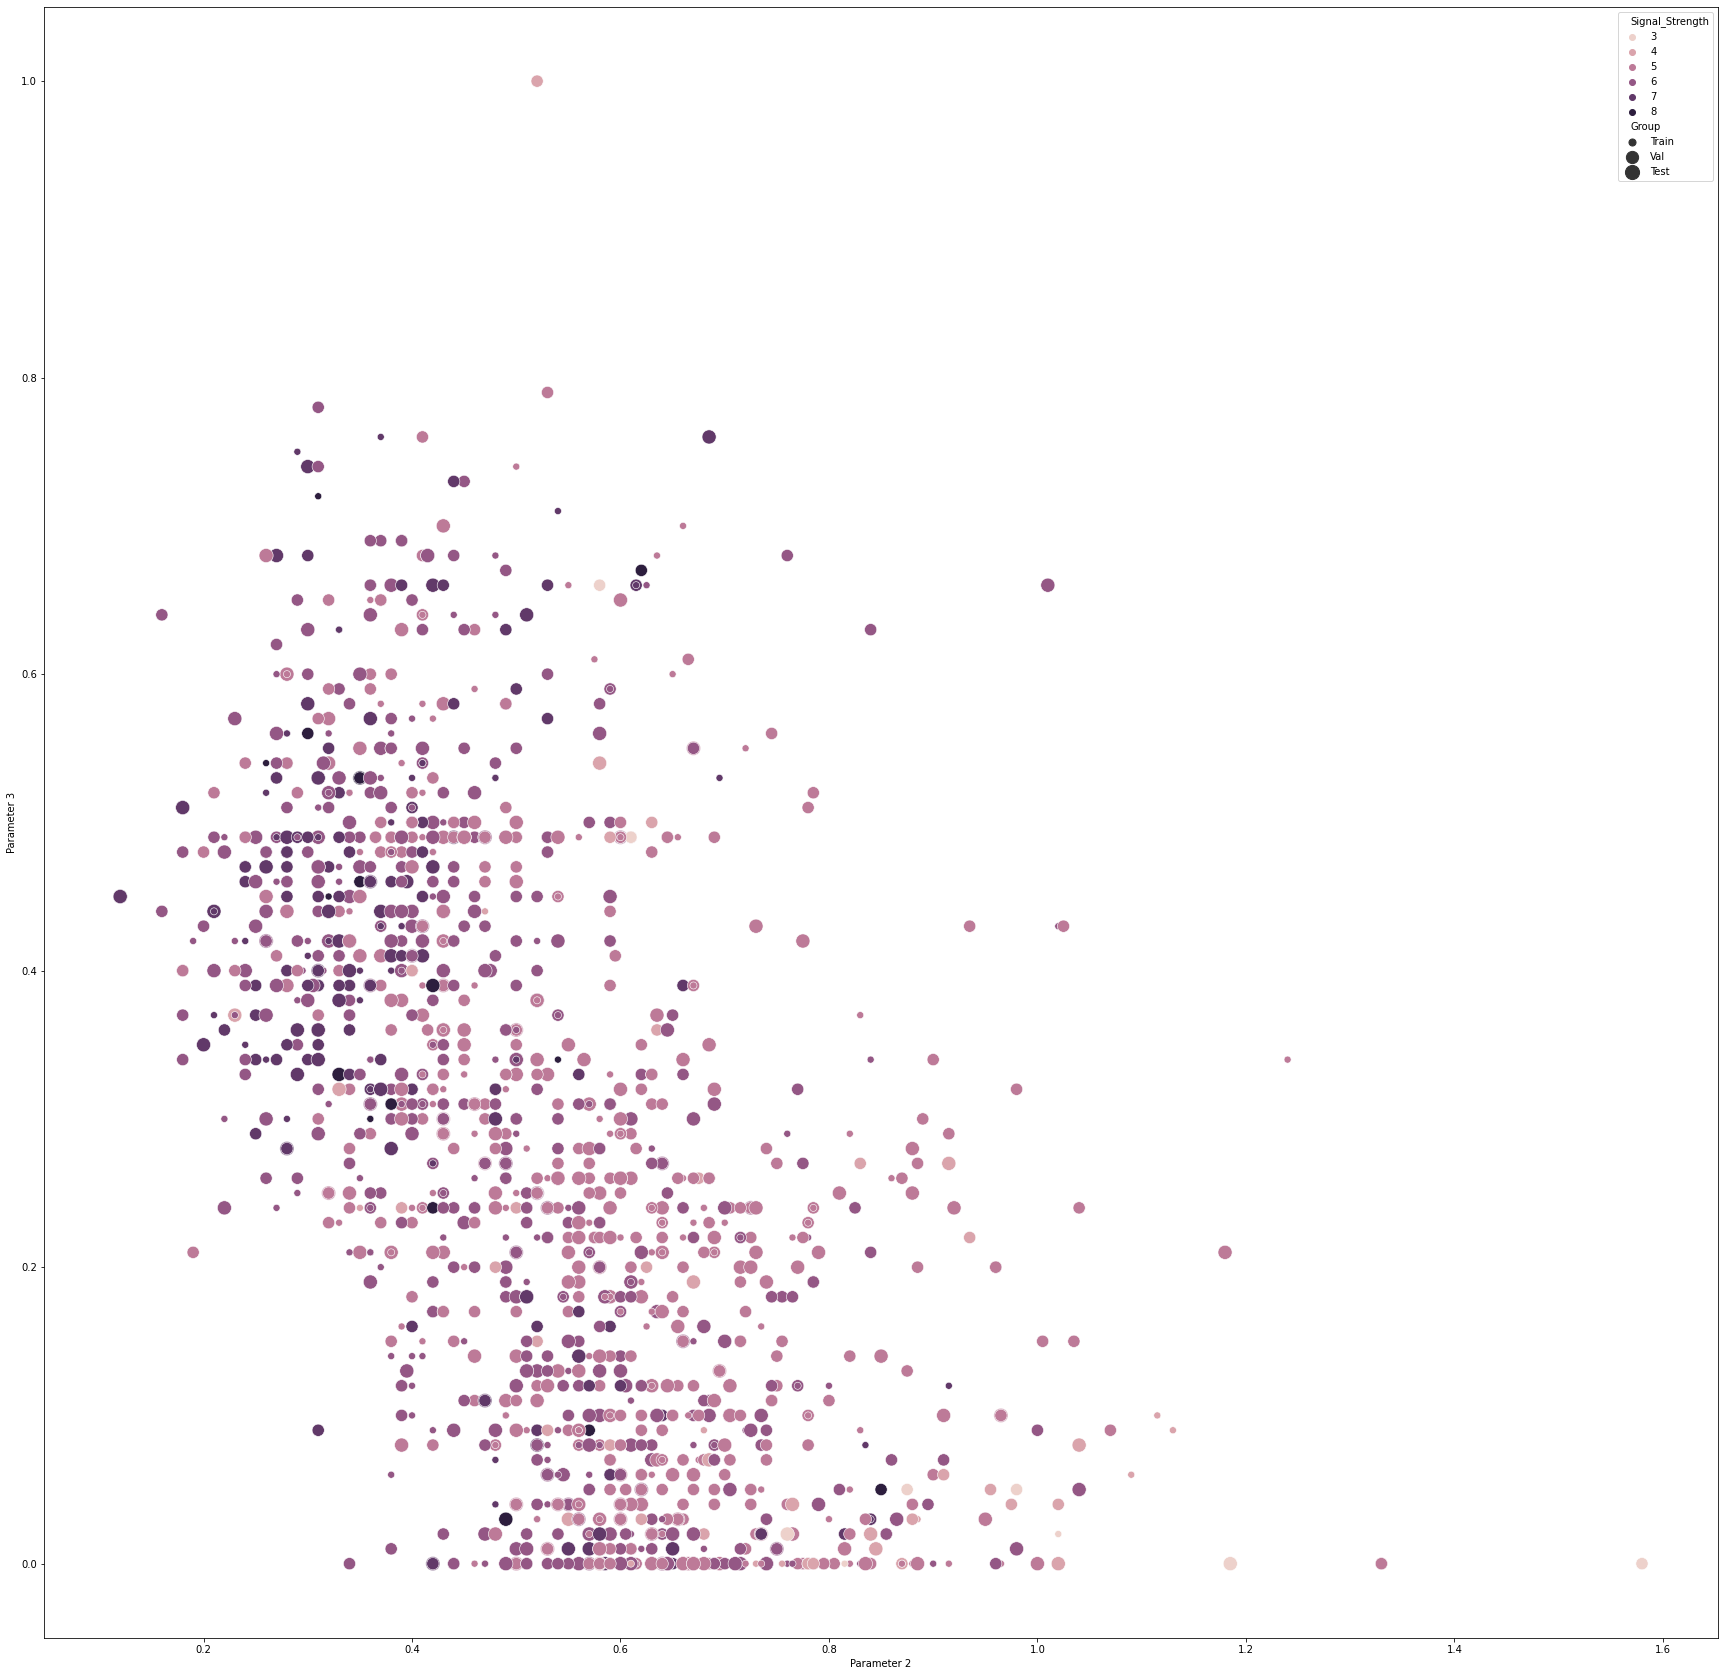

In [14]:
# Bivariate analysis
plt.figure(figsize = (30, 30))
sns.scatterplot(data=df_master, x="Parameter 2", y="Parameter 3", hue="Signal_Strength", size="Group", sizes=[50, 150, 200]
        , size_order=["Train", "Val", "Test"])
plt.show()

#### 3. Design, train, tune and test a neural network regressor. 
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here

###### <font color=#B40404>Note that since 0, 1 & 2 have no representation hence we will be selecting an output layer of 6 (3, 4, 5, 6, 7 & 8). So we are converting the target variable to 0, 1, 2, 3, 4 & 5 to represent 3, 4, 5, 6, 7 & 8 respectively. Hence we are subtracting 3 from the target variable to achieve what was mentioned above. On the output side 3 needs to be added to the prediction to get the actual result. However, for the purposes of this modelling we will not convert to original outputs all the time.

In [15]:
# Setting up train, validation and test set target variable for Neural network classifier
y_train = tensorflow.keras.utils.to_categorical(y_train-3, num_classes=6)
y_val = tensorflow.keras.utils.to_categorical(y_val-3, num_classes=6)
y_test = tensorflow.keras.utils.to_categorical(y_test-3, num_classes=6)

In [16]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_node1 = 26
    hidden_node2 = 14
    output_nodes = 6
        
    model = Sequential()
    model.add(Dense(hidden_node1, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_node2, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(np.array(X_train), y_train, epochs=iterations, batch_size=1000, verbose= 1)

###### <font color=#B40404>Running Sanity Checks. Multiple experiments has been done here but I leave the most important ones for cross check.

In [36]:
lr = 1e-2
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
1/1 [==============================] - 0s 0s/step - loss: 2.1247 - accuracy: 0.0526
Epoch 2/20
1/1 [==============================] - 0s 0s/step - loss: 2.1091 - accuracy: 0.0588
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 2.0804 - accuracy: 0.0663
Epoch 4/20
1/1 [==============================] - 0s 0s/step - loss: 2.0414 - accuracy: 0.0826
Epoch 5/20
1/1 [==============================] - 0s 8ms/step - loss: 1.9947 - accuracy: 0.0976
Epoch 6/20
1/1 [==============================] - 0s 0s/step - loss: 1.9430 - accuracy: 0.1189
Epoch 7/20
1/1 [==============================] - 0s 0s/step - loss: 1.8893 - accuracy: 0.1402
Epoch 8/20
1/1 [==============================] - 0s 0s/step - loss: 1.8355 - accuracy: 0.1790
Epoch 9/20
1/1 [==============================] - 0s 0s/step - loss: 1.7835 - accuracy: 0.2190
Epoch 10/20
1/1 [==============================] - 0s 0s/step - loss: 1.7339 - accuracy: 0.2591
Epoch 11/20
1/1 [==============================

In [22]:
lr = 0.01
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 1.9885 - accuracy: 0.0500
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 1.9708 - accuracy: 0.0500
Epoch 3/500
1/1 [==============================] - 0s 0s/step - loss: 1.9380 - accuracy: 0.0500
Epoch 4/500
1/1 [==============================] - 0s 0s/step - loss: 1.8930 - accuracy: 0.0500
Epoch 5/500
1/1 [==============================] - 0s 0s/step - loss: 1.8389 - accuracy: 0.0500
Epoch 6/500
1/1 [==============================] - 0s 0s/step - loss: 1.7784 - accuracy: 0.1000
Epoch 7/500
1/1 [==============================] - 0s 0s/step - loss: 1.7134 - accuracy: 0.1500
Epoch 8/500
1/1 [==============================] - 0s 0s/step - loss: 1.6464 - accuracy: 0.3500
Epoch 9/500
1/1 [==============================] - 0s 0s/step - loss: 1.5784 - accuracy: 0.4500
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 1.5099 - accuracy: 0.5000
Epoch 11/500
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 0.1612 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 0s/step - loss: 0.1593 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 0s/step - loss: 0.1574 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 0s/step - loss: 0.1555 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 0s/step - loss: 0.1536 - accuracy: 1.0000
Epoch 173/500
1/1 [==============================] - 0s 0s/step - loss: 0.1518 - accuracy: 1.0000
Epoch 174/500
1/1 [==============================] - 0s 0s/step - loss: 0.1499 - accuracy: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 0s/step - loss: 0.1481 - accuracy: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 0s/step - loss: 0.1463 - accuracy: 1.0000
Epoch 177/500
1/1 [==============================] - 0s 0s/step - loss: 0.1445 - accuracy: 1.0000
Epoch 178/500
1/1 [===============

1/1 [==============================] - 0s 0s/step - loss: 0.0237 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 0s/step - loss: 0.0233 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 0s/step - loss: 0.0231 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 0s/step - loss: 0.0229 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 0s/step - loss: 0.0227 - accuracy: 1.0000
Epoch 340/500
1/1 [==============================] - 0s 0s/step - loss: 0.0225 - accuracy: 1.0000
Epoch 341/500
1/1 [==============================] - 0s 0s/step - loss: 0.0224 - accuracy: 1.0000
Epoch 342/500
1/1 [==============================] - 0s 0s/step - loss: 0.0222 - accuracy: 1.0000
Epoch 343/500
1/1 [==============================] - 0s 0s/step - loss: 0.0220 - accuracy: 1.0000
Epoch 344/500
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 0.0088 - accuracy: 1.0000


In [10]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

1/1 [==============================] - 0s 8ms/step - loss: 9411.3271 - accuracy: 0.0288


In [9]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

1/1 [==============================] - 0s 0s/step - loss: 1.8391 - accuracy: 0.2315


In [47]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):
    
    score = {}
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_node1 = 26
    hidden_node2 = 14
    output_nodes = 6

    model = Sequential()
    model.add(Dense(hidden_node1, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_node2, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['AUC'])
    
    # Fit the model
    model.fit(np.array(X_train), y_train, epochs=iterations, batch_size=1000, verbose=0)
    
    score["train"] = model.evaluate(np.array(X_train), y_train, verbose=0)
    score["val"] = model.evaluate(np.array(X_val), y_val, verbose=0)
    
    return score

In [55]:
# Creating an evaluation Dataframe for further use
df_eval = pd.DataFrame(columns=["LR", "Lambda", "train_loss", "train_accuracy", "val_loss", "val_accuracy"])

###### <font color=#B40404>Experiment has been done here on batches of 10 with all experiment values logged in df_eval. Re-running this part of the code will result in new results.

In [81]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-2, -1))
    Lambda = 3.1478848403116417e-06
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2},\n lr: {3}, Lambda: {4}".format(k, 9, best_acc, lr, Lambda))
    df_eval.loc[len(df_eval)] = [lr, Lambda, best_acc["train"][0], best_acc["train"][1],
                                best_acc["val"][0], best_acc["val"][1]]

Try 1/9: Best_val_acc: {'train': [0.9688308238983154, 0.9044107794761658], 'val': [1.0201138257980347, 0.890222430229187]},
 lr: 0.014348159897365887, Lambda: 3.1478848403116417e-06
Try 2/9: Best_val_acc: {'train': [0.9711223244667053, 0.902430534362793], 'val': [1.041279911994934, 0.8853806257247925]},
 lr: 0.016442724939477668, Lambda: 3.1478848403116417e-06
Try 3/9: Best_val_acc: {'train': [0.8739877343177795, 0.9200472235679626], 'val': [0.9909087419509888, 0.8968706130981445]},
 lr: 0.06372093096397173, Lambda: 3.1478848403116417e-06
Try 4/9: Best_val_acc: {'train': [0.8931687474250793, 0.9168083071708679], 'val': [0.9833325147628784, 0.8989100456237793]},
 lr: 0.06357205192716267, Lambda: 3.1478848403116417e-06
Try 5/9: Best_val_acc: {'train': [0.9894654154777527, 0.898215651512146], 'val': [1.0403515100479126, 0.8824206590652466]},
 lr: 0.011785503095166714, Lambda: 3.1478848403116417e-06
Try 6/9: Best_val_acc: {'train': [0.8553031086921692, 0.9235700368881226], 'val': [0.999190

In [84]:
# Display evaluation table
df_eval

LR    Lambda  train_loss  train_accuracy  val_loss  val_accuracy
0   2.365837  0.009159    1.185705        0.835044  1.193376      0.833500
1   3.902845  0.000001    1.192948        0.835044  1.200686      0.833500
2   0.363104  0.000061    0.600174        0.963549  1.227158      0.880469
3   0.023226  0.000313    0.985064        0.898697  1.011453      0.890100
4   1.837335  0.000319    1.202507        0.835044  1.210242      0.833500
..       ...       ...         ...             ...       ...           ...
85  0.011786  0.000003    0.989465        0.898216  1.040352      0.882421
86  0.063965  0.000003    0.855303        0.923570  0.999191      0.898499
87  0.015296  0.000003    0.962583        0.903070  1.013038      0.891631
88  0.051082  0.000003    0.886023        0.919236  0.982415      0.898697
89  0.031450  0.000003    0.914791        0.912767  0.987281      0.896090

[90 rows x 6 columns]

###### <font color=#B40404>Visualising the Loss. 
    
###### <font color=#B40404>Note that while re-running this step will fail if there is only 10 datapoints in df_eval. You need to run multiple experiments before the next step is a logical step to be carried out.

Text(0.5, 0, 'x')

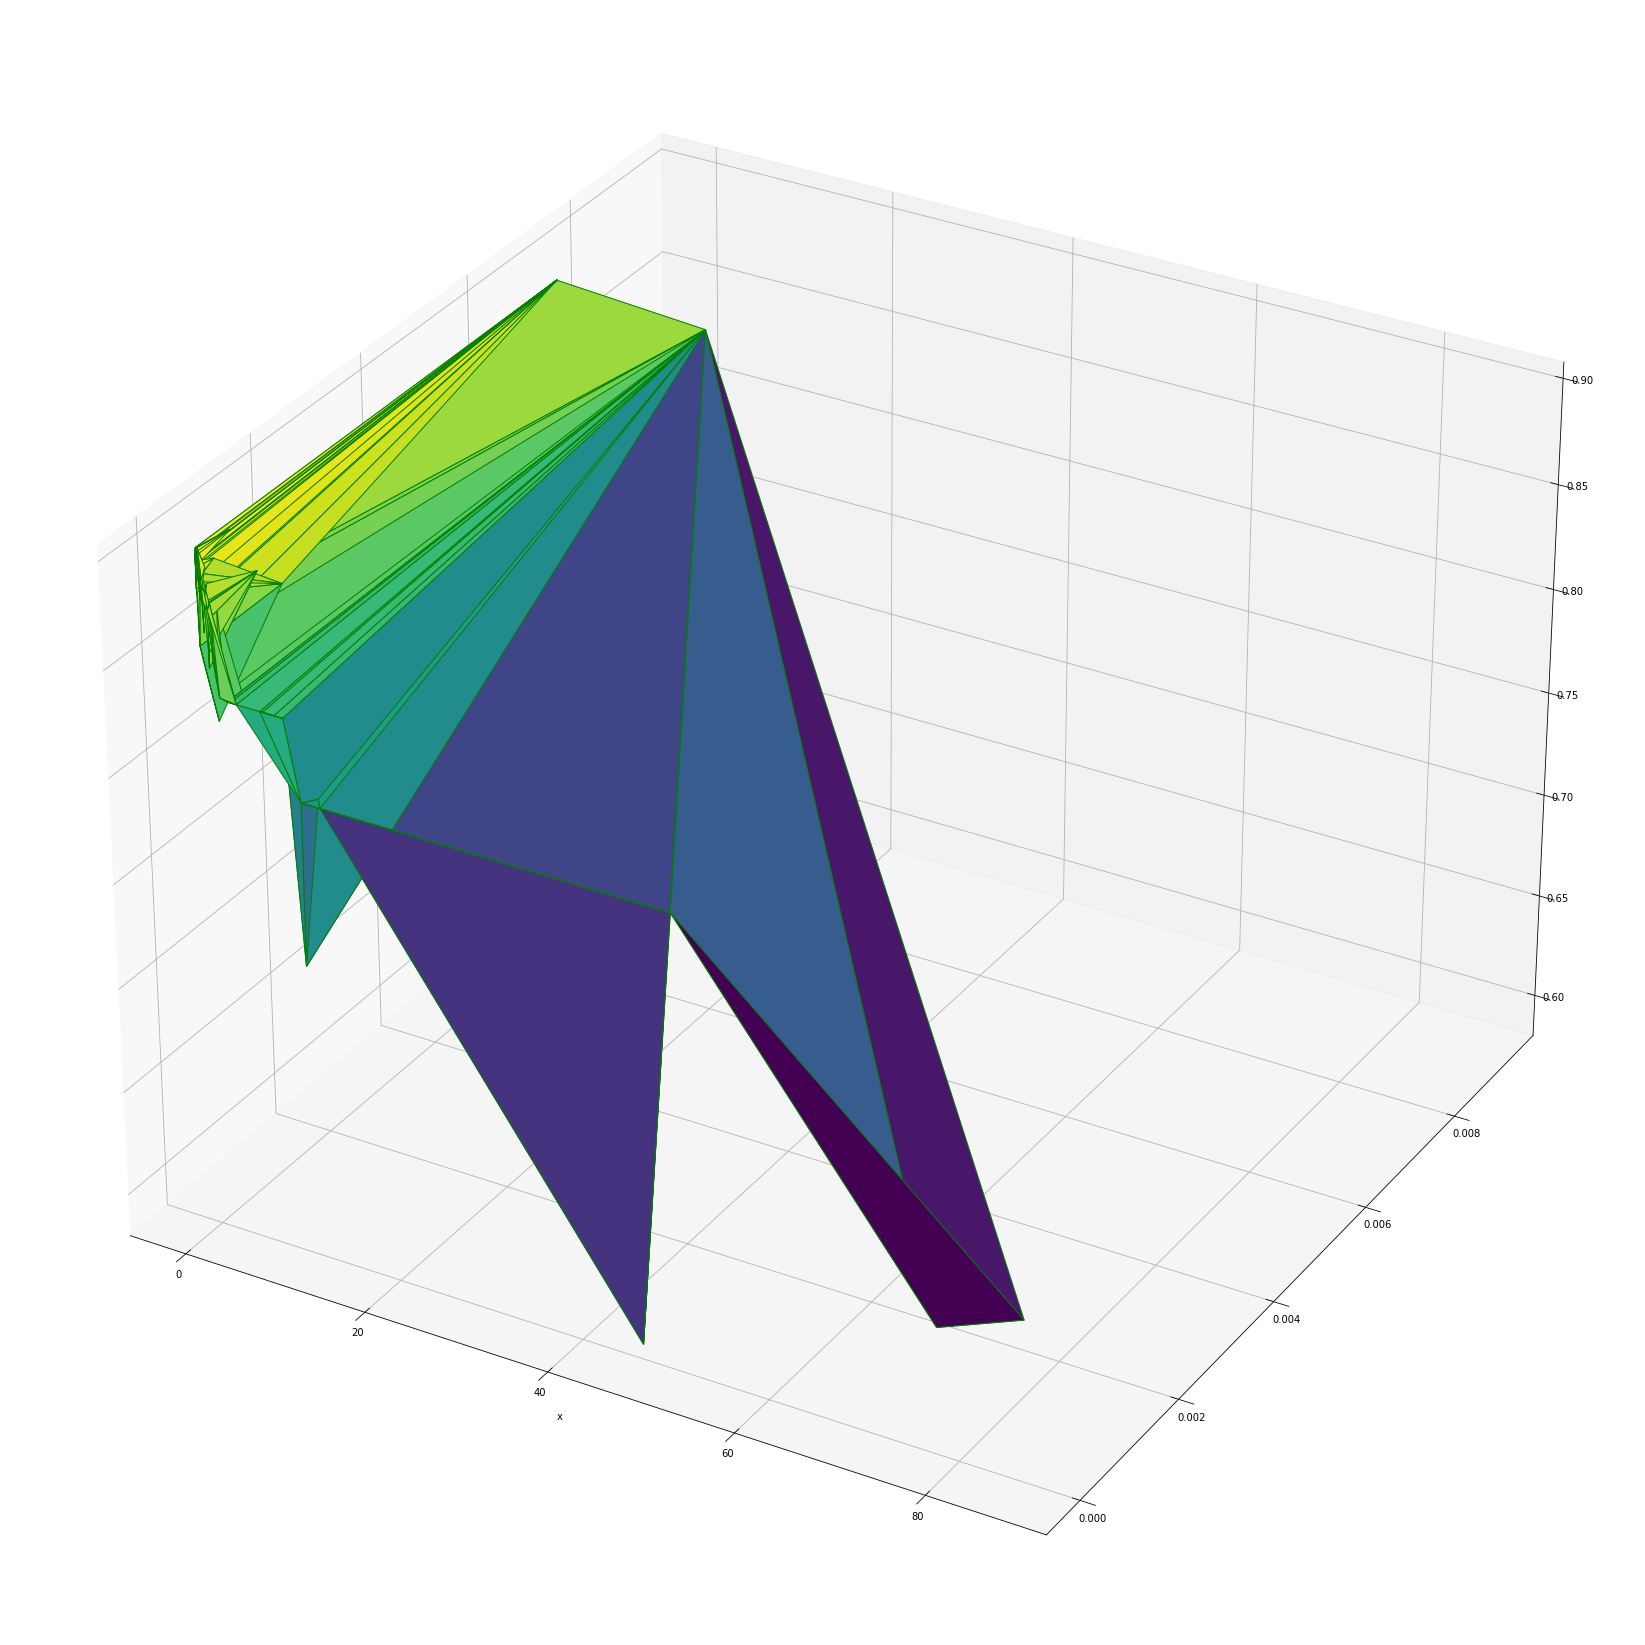

In [86]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (30, 30))
# all three axes
x = df_eval["LR"]
y = df_eval["Lambda"]
z = df_eval["val_accuracy"]
 
ax = plt.axes(projection ='3d')
ax.scatter(x, y, z, c = z, cmap ='viridis', linewidth = 0.25);
 
ax = plt.axes(projection ='3d')
ax.plot_trisurf(x, y, z, cmap ='viridis', edgecolor ='green');
ax.set_xlabel("x")

###### <font color=#B40404>Running the neural network with the most ideal Hyperpaparameters and architecture after multiple experiments. Also running the Validation set for comparison. Using Metric AUC since clearly class is not uniformly distributed.

In [16]:
iterations = 100
learning_rate = 0.06372093096397173
Lambda = 3.1478848403116417e-06
hidden_node1 = 26
hidden_node2 = 14
output_nodes = 6

model = Sequential()
model.add(Dense(hidden_node1, input_shape=(11,), activation='relu'))
model.add(Dense(hidden_node2, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['AUC'])

# Fit the model
hist = model.fit(np.array(X_train), y_train, epochs=iterations, batch_size=1000, verbose=2,
                validation_data=(X_val, y_val))

Epoch 1/100
1/1 - 0s - loss: 1.8186 - auc: 0.6023 - val_loss: 1.7572 - val_auc: 0.6441
Epoch 2/100
1/1 - 0s - loss: 1.7610 - auc: 0.6373 - val_loss: 1.6693 - val_auc: 0.6980
Epoch 3/100
1/1 - 0s - loss: 1.6675 - auc: 0.6968 - val_loss: 1.5715 - val_auc: 0.7595
Epoch 4/100
1/1 - 0s - loss: 1.5633 - auc: 0.7623 - val_loss: 1.4797 - val_auc: 0.8062
Epoch 5/100
1/1 - 0s - loss: 1.4664 - auc: 0.8093 - val_loss: 1.4015 - val_auc: 0.8329
Epoch 6/100
1/1 - 0s - loss: 1.3836 - auc: 0.8366 - val_loss: 1.3368 - val_auc: 0.8439
Epoch 7/100
1/1 - 0s - loss: 1.3150 - auc: 0.8501 - val_loss: 1.2833 - val_auc: 0.8486
Epoch 8/100
1/1 - 0s - loss: 1.2585 - auc: 0.8569 - val_loss: 1.2406 - val_auc: 0.8525
Epoch 9/100
1/1 - 0s - loss: 1.2129 - auc: 0.8614 - val_loss: 1.2094 - val_auc: 0.8554
Epoch 10/100
1/1 - 0s - loss: 1.1775 - auc: 0.8652 - val_loss: 1.1877 - val_auc: 0.8583
Epoch 11/100
1/1 - 0s - loss: 1.1518 - auc: 0.8682 - val_loss: 1.1730 - val_auc: 0.8606
Epoch 12/100
1/1 - 0s - loss: 1.1339 - au

Epoch 95/100
1/1 - 0s - loss: 0.8510 - auc: 0.9246 - val_loss: 0.9978 - val_auc: 0.8972
Epoch 96/100
1/1 - 0s - loss: 0.8497 - auc: 0.9248 - val_loss: 0.9978 - val_auc: 0.8973
Epoch 97/100
1/1 - 0s - loss: 0.8484 - auc: 0.9251 - val_loss: 0.9977 - val_auc: 0.8974
Epoch 98/100
1/1 - 0s - loss: 0.8471 - auc: 0.9253 - val_loss: 0.9976 - val_auc: 0.8976
Epoch 99/100
1/1 - 0s - loss: 0.8458 - auc: 0.9254 - val_loss: 0.9975 - val_auc: 0.8977
Epoch 100/100
1/1 - 0s - loss: 0.8445 - auc: 0.9256 - val_loss: 0.9974 - val_auc: 0.8977


In [17]:
# Evaluation of the model against validation set separately
model.evaluate(np.array(X_val), y_val, verbose=1)

13/13 [==============================] - 0s 2ms/step - loss: 0.9974 - auc: 0.8977


[0.997394859790802, 0.8977106213569641]

In [18]:
# Running the final model on the test set 
model.evaluate(np.array(X_test), np.array(y_test), verbose=0)

[0.9071255326271057, 0.914591908454895]

#### 4. Pickle the model for future use

In [19]:
import pickle
from keras_pickle_wrapper import KerasPickleWrapper

# Wrap a compiled model
mw = KerasPickleWrapper(model)

# Create Pickle file from the pipeline created around the final model
with open('final_model.pickle', 'wb') as dump_var:
    pickle.dump(mw, dump_var)

# <center>PART TWO</center>
# <center>PROJECT BASED</center>
# <center>TOTAL SCORE - 30</center>

DOMAIN: Autonomous Vehicles

BUSINESS CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic 
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic 
images. 
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This 
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character 
arrangements. 
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

Steps and tasks:

In [1]:
import pandas as pd
import numpy as np
import h5py
import tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers
import math

#### 1. Import the data

In [2]:
# Import Data
h5 = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

# Check keys
h5.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [3]:
# Load data into train, validation and test set
X_train = np.array(h5['X_val'])
X_test = np.array(h5['X_test'])
X_val = np.array(h5['X_train'])
y_train = np.array(h5['y_val'])
y_test = np.array(h5['y_test'])
y_val = np.array(h5['y_train'])

print("Train")
print(X_train.shape)
print(y_train.shape)
print("Validation")
print(X_val.shape)
print(y_val.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

Train
(60000, 32, 32)
(60000,)
Validation
(42000, 32, 32)
(42000,)
Test
(18000, 32, 32)
(18000,)


#### 2. Data pre-processing and visualisation

In [4]:
# Reshape data
X_train = X_train.reshape(60000, 1024)
print(X_train.shape)
X_val = X_val.reshape(42000, 1024)
print(X_val.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(60000, 1024)
(42000, 1024)
(18000, 1024)


In [5]:
# Standardise Data
print("Range", X_train.max() - X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0

print(X_train.max())
print(X_train.min())

Range 254.9745
0.9999
0.0


In [6]:
# Rearrange target variable for NN classifier
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0


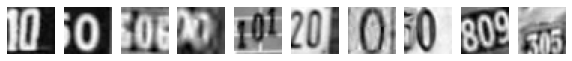

In [7]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

4

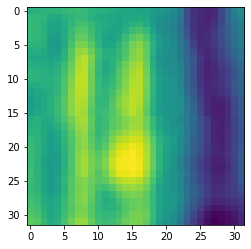

In [8]:
# Viewing specific images
plt.imshow(np.array(h5['X_train'])[4])
np.array(h5['y_train'])[4]

In [9]:
# Checking the distribution of the results
for i in range(y_val.shape[1]):
    cnt = 0
    for j in range(y_val.shape[0]):
        cnt += y_val[j][i]
    print(i, cnt)

0 4186.0
1 4172.0
2 4197.0
3 4281.0
4 4188.0
5 4232.0
6 4168.0
7 4192.0
8 4188.0
9 4196.0


###### <font color=#B40404>Distribution is pretty even and hence Accuracy would be an easy and good metric to use for evaluation.

#### 3. Design, train, tune and test a neural network image classifier. 
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model

In [10]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 339
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

In [11]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 339
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 0)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

###### <font color=#B40404>Running Multiple Sanity Checks. Only the important ones have been displayed for cross check.

In [67]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 19ms/step - loss: 2.3612 - accuracy: 0.0999


In [68]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 19ms/step - loss: 3335.3435 - accuracy: 0.1010


In [70]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 0s/step - loss: 2.3780 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3554 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3144 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2603 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 998us/step - loss: 2.1986 - accuracy: 0.1500
Epoch 6/500
1/1 [==============================] - 0s 997us/step - loss: 2.1341 - accuracy: 0.2000
Epoch 7/500
1/1 [==============================] - 0s 997us/step - loss: 2.0731 - accuracy: 0.2000
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 2.0189 - accuracy: 0.2500
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 1.9734 - accuracy: 0.2500
Epoch 10/500
1/1 [==============================] - 0s 993us/step - loss: 1.9372 - accuracy: 0.3000
Epoch 

1/1 [==============================] - 0s 997us/step - loss: 0.9208 - accuracy: 0.8000
Epoch 166/500
1/1 [==============================] - 0s 999us/step - loss: 0.9162 - accuracy: 0.8000
Epoch 167/500
1/1 [==============================] - 0s 3ms/step - loss: 0.9116 - accuracy: 0.8000
Epoch 168/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9071 - accuracy: 0.8000
Epoch 169/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9025 - accuracy: 0.8000
Epoch 170/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8980 - accuracy: 0.8000
Epoch 171/500
1/1 [==============================] - 0s 999us/step - loss: 0.8935 - accuracy: 0.8000
Epoch 172/500
1/1 [==============================] - 0s 1ms/step - loss: 0.8890 - accuracy: 0.8000
Epoch 173/500
1/1 [==============================] - 0s 1000us/step - loss: 0.8845 - accuracy: 0.8000
Epoch 174/500
1/1 [==============================] - 0s 998us/step - loss: 0.8801 - accuracy: 0.8000
Epoch 175/500

1/1 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 1.0000
Epoch 248/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 1.0000
Epoch 249/500
1/1 [==============================] - 0s 999us/step - loss: 0.5885 - accuracy: 1.0000
Epoch 250/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 1.0000
Epoch 251/500
1/1 [==============================] - 0s 998us/step - loss: 0.5819 - accuracy: 1.0000
Epoch 252/500
1/1 [==============================] - 0s 997us/step - loss: 0.5785 - accuracy: 1.0000
Epoch 253/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 1.0000
Epoch 254/500
1/1 [==============================] - 0s 997us/step - loss: 0.5720 - accuracy: 1.0000
Epoch 255/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 1.0000
Epoch 256/500
1/1 [==============================] - 0s 997us/step - loss: 0.5655 - accuracy: 1.0000
Epoch 257/500


1/1 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 1.0000
Epoch 410/500
1/1 [==============================] - 0s 995us/step - loss: 0.2245 - accuracy: 1.0000
Epoch 411/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 1.0000
Epoch 412/500
1/1 [==============================] - 0s 997us/step - loss: 0.2220 - accuracy: 1.0000
Epoch 413/500
1/1 [==============================] - 0s 995us/step - loss: 0.2207 - accuracy: 1.0000
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 1.0000
Epoch 415/500
1/1 [==============================] - 0s 998us/step - loss: 0.2182 - accuracy: 1.0000
Epoch 416/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 1.0000
Epoch 417/500
1/1 [==============================] - 0s 997us/step - loss: 0.2158 - accuracy: 1.0000
Epoch 418/500
1/1 [==============================] - 0s 996us/step - loss: 0.2145 - accuracy: 1.0000
Epoch 419/50

Epoch 491/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 1.0000
Epoch 492/500
1/1 [==============================] - 0s 999us/step - loss: 0.1458 - accuracy: 1.0000
Epoch 493/500
1/1 [==============================] - 0s 997us/step - loss: 0.1451 - accuracy: 1.0000
Epoch 494/500
1/1 [==============================] - 0s 996us/step - loss: 0.1444 - accuracy: 1.0000
Epoch 495/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 997us/step - loss: 0.1430 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 997us/step - loss: 0.1423 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 997us/step - loss: 0.1416 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 998us/step - loss: 0.1410 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 995us/step - loss: 0.1403 - accuracy: 1

In [82]:
lr = 1e-5
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 20ms/step - loss: 2.3833 - accuracy: 0.0986
Epoch 2/20
42/42 [==============================] - 1s 19ms/step - loss: 2.3737 - accuracy: 0.0988
Epoch 3/20
42/42 [==============================] - 1s 20ms/step - loss: 2.3650 - accuracy: 0.0985
Epoch 4/20
42/42 [==============================] - 1s 18ms/step - loss: 2.3574 - accuracy: 0.0985
Epoch 5/20
42/42 [==============================] - 1s 18ms/step - loss: 2.3508 - accuracy: 0.0983
Epoch 6/20
42/42 [==============================] - 1s 19ms/step - loss: 2.3449 - accuracy: 0.0991
Epoch 7/20
42/42 [==============================] - 1s 18ms/step - loss: 2.3398 - accuracy: 0.1013
Epoch 8/20
42/42 [==============================] - 1s 19ms/step - loss: 2.3353 - accuracy: 0.1029
Epoch 9/20
42/42 [==============================] - 1s 19ms/step - loss: 2.3314 - accuracy: 0.1048
Epoch 10/20
42/42 [==============================] - 1s 19ms/step - loss: 2.3279 - accuracy: 0.1068
Epoch 11/

In [73]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.0995
Epoch 2/20
42/42 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.0997
Epoch 3/20
42/42 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.0997
Epoch 4/20
42/42 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.0997
Epoch 5/20
42/42 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.0997
Epoch 6/20
42/42 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
42/42 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.0997
Epoch 8/20
42/42 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0997
Epoch 9/20
42/42 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0997
Epoch 10/20
42/42 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0997
Epoch 11/20
42/42 [====================

In [83]:
lr = 1e-1
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 19ms/step - loss: 2.2961 - accuracy: 0.1393
Epoch 2/20
42/42 [==============================] - 1s 18ms/step - loss: 2.0985 - accuracy: 0.2742
Epoch 3/20
42/42 [==============================] - 1s 18ms/step - loss: 2.2070 - accuracy: 0.2713
Epoch 4/20
42/42 [==============================] - 1s 19ms/step - loss: 2.0607 - accuracy: 0.2755
Epoch 5/20
42/42 [==============================] - 1s 18ms/step - loss: 2.1432 - accuracy: 0.2175
Epoch 6/20
42/42 [==============================] - 1s 19ms/step - loss: 2.1518 - accuracy: 0.1935
Epoch 7/20
42/42 [==============================] - 1s 19ms/step - loss: 2.0752 - accuracy: 0.2351
Epoch 8/20
42/42 [==============================] - 1s 18ms/step - loss: 2.2189 - accuracy: 0.1578
Epoch 9/20
42/42 [==============================] - 1s 19ms/step - loss: 2.2661 - accuracy: 0.1427
Epoch 10/20
42/42 [==============================] - 1s 19ms/step - loss: 2.2083 - accuracy: 0.1676
Epoch 11/

###### <font color=#B40404>Running progressive finer tuning checks on hyperparameters to arrive to the best loss and accuracy values

In [87]:
for k in range(1,10):
    lr = np.random.uniform(0.01, 0.1)
    Lambda = 1.3190300180182324e-05
#     math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 9, best_acc, lr, Lambda))

Try 1/9: Best_val_acc: [0.42673882842063904, 0.8680475950241089], lr: 0.09508597207038409, Lambda: 1.3190300180182324e-05

Try 2/9: Best_val_acc: [0.3390926718711853, 0.899404764175415], lr: 0.02386272523187538, Lambda: 1.3190300180182324e-05

Try 3/9: Best_val_acc: [0.23015905916690826, 0.9267619252204895], lr: 0.06951722705476646, Lambda: 1.3190300180182324e-05

Try 4/9: Best_val_acc: [0.3857276141643524, 0.8785476088523865], lr: 0.07461987672442802, Lambda: 1.3190300180182324e-05

Try 5/9: Best_val_acc: [0.24405735731124878, 0.9240238070487976], lr: 0.08657951857639976, Lambda: 1.3190300180182324e-05

Try 6/9: Best_val_acc: [0.2613851726055145, 0.9215952157974243], lr: 0.03401920453424891, Lambda: 1.3190300180182324e-05

Try 7/9: Best_val_acc: [0.6123517751693726, 0.8116190433502197], lr: 0.09763818514424291, Lambda: 1.3190300180182324e-05

Try 8/9: Best_val_acc: [0.3451426327228546, 0.899142861366272], lr: 0.018966539181242192, Lambda: 1.3190300180182324e-05

Try 9/9: Best_val_acc:

###### <font color=#B40404>Running the best hyperparameters

In [12]:
Lambda = 1.5e-04
## hyperparameters
iterations = 150
learning_rate = 0.0589421087034557
hidden_nodes = 339
output_nodes = 10

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
hist = model.fit(X_train, y_train, epochs=iterations, batch_size=1000, 
                 verbose=2, validation_data=(X_val, y_val))

Epoch 1/150
60/60 - 1s - loss: 2.2702 - accuracy: 0.1725 - val_loss: 2.1464 - val_accuracy: 0.3373
Epoch 2/150
60/60 - 1s - loss: 1.8702 - accuracy: 0.3972 - val_loss: 1.6748 - val_accuracy: 0.4227
Epoch 3/150
60/60 - 1s - loss: 1.5044 - accuracy: 0.5080 - val_loss: 1.3885 - val_accuracy: 0.5410
Epoch 4/150
60/60 - 1s - loss: 1.2815 - accuracy: 0.5899 - val_loss: 1.2398 - val_accuracy: 0.6029
Epoch 5/150
60/60 - 1s - loss: 1.1706 - accuracy: 0.6309 - val_loss: 1.1259 - val_accuracy: 0.6501
Epoch 6/150
60/60 - 1s - loss: 1.0593 - accuracy: 0.6730 - val_loss: 1.0446 - val_accuracy: 0.6688
Epoch 7/150
60/60 - 1s - loss: 0.9721 - accuracy: 0.7018 - val_loss: 0.9005 - val_accuracy: 0.7358
Epoch 8/150
60/60 - 1s - loss: 0.9259 - accuracy: 0.7182 - val_loss: 0.9432 - val_accuracy: 0.7065
Epoch 9/150
60/60 - 1s - loss: 0.8831 - accuracy: 0.7311 - val_loss: 0.8567 - val_accuracy: 0.7397
Epoch 10/150
60/60 - 1s - loss: 0.8282 - accuracy: 0.7496 - val_loss: 0.8083 - val_accuracy: 0.7544
Epoch 11/

60/60 - 1s - loss: 0.2898 - accuracy: 0.9170 - val_loss: 0.3210 - val_accuracy: 0.9058
Epoch 84/150
60/60 - 1s - loss: 0.2944 - accuracy: 0.9151 - val_loss: 0.2730 - val_accuracy: 0.9263
Epoch 85/150
60/60 - 1s - loss: 0.2788 - accuracy: 0.9220 - val_loss: 0.2717 - val_accuracy: 0.9242
Epoch 86/150
60/60 - 1s - loss: 0.2844 - accuracy: 0.9195 - val_loss: 0.2742 - val_accuracy: 0.9226
Epoch 87/150
60/60 - 1s - loss: 0.2795 - accuracy: 0.9217 - val_loss: 0.2655 - val_accuracy: 0.9269
Epoch 88/150
60/60 - 1s - loss: 0.2799 - accuracy: 0.9210 - val_loss: 0.2806 - val_accuracy: 0.9201
Epoch 89/150
60/60 - 1s - loss: 0.2814 - accuracy: 0.9201 - val_loss: 0.2681 - val_accuracy: 0.9255
Epoch 90/150
60/60 - 1s - loss: 0.2766 - accuracy: 0.9230 - val_loss: 0.2638 - val_accuracy: 0.9269
Epoch 91/150
60/60 - 1s - loss: 0.2633 - accuracy: 0.9267 - val_loss: 0.2561 - val_accuracy: 0.9294
Epoch 92/150
60/60 - 1s - loss: 0.2651 - accuracy: 0.9262 - val_loss: 0.2664 - val_accuracy: 0.9246
Epoch 93/150


#### 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

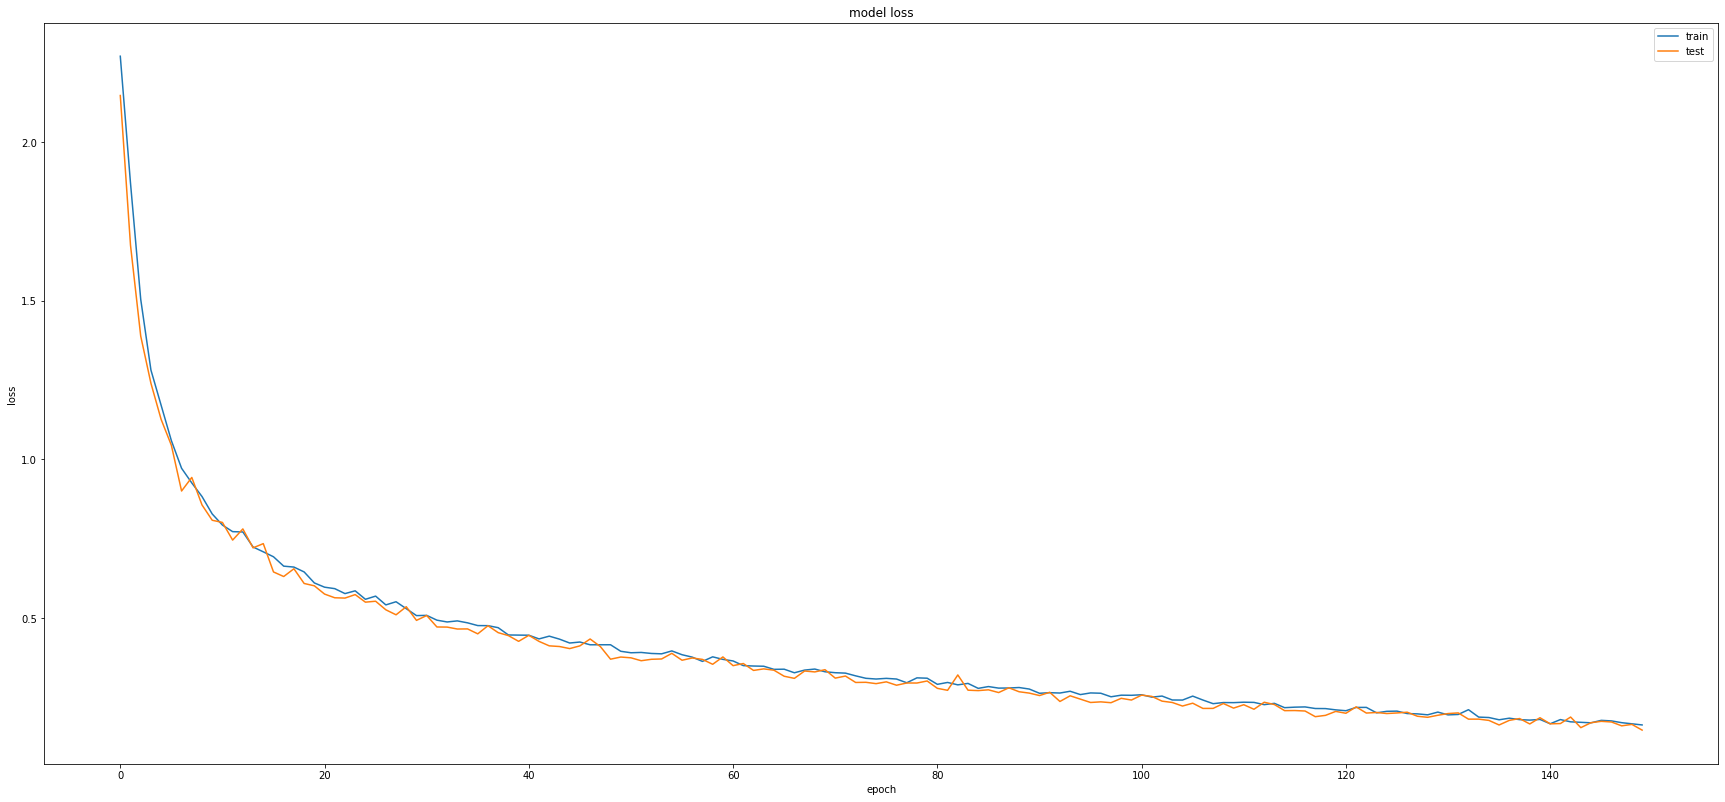

In [13]:
plt.figure(figsize = (30, 30))
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

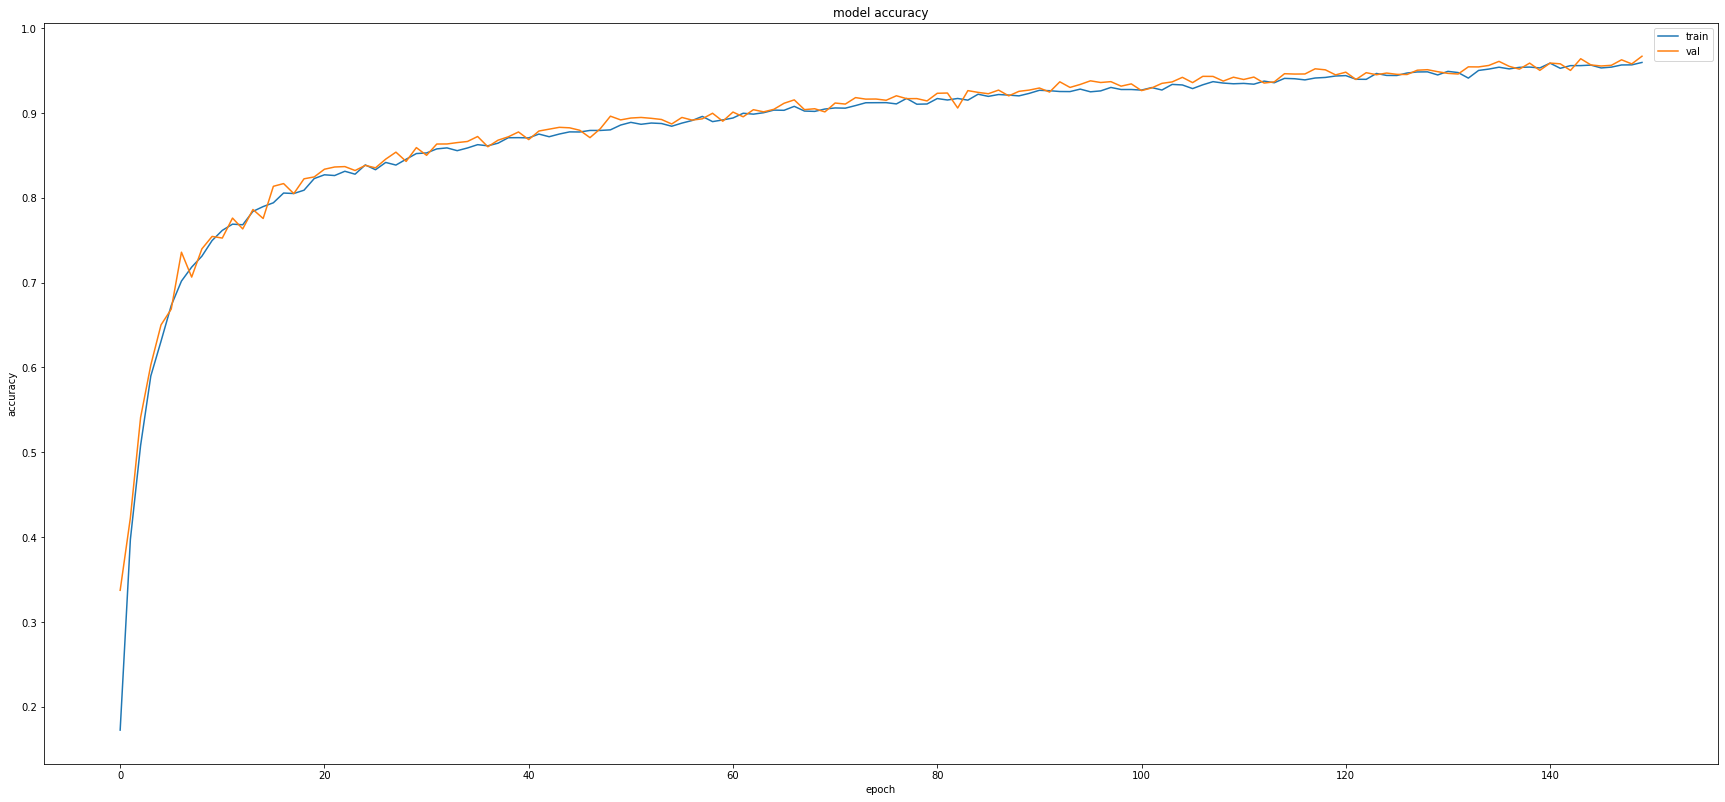

In [14]:
plt.figure(figsize = (30, 30))
plt.subplot(2,1,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

###### <font color=#B40404>As we can see from the above two graphs that the Validation accuracy and loss is tracking the Training accuracy and loss very closely. We have tried higher number of epochs and have noted that the accuracy and loss of Validation set starts to separate after this point. That would suggest overfitting with further epochs. Hence 150 iterations was the best point to call off searching for the ideal weights. The results are pretty great as well, we achieved 96% accuracy with our validation set.